In [1]:
print('ok')

ok


In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [3]:
size = [224, 224] + [3]

In [4]:
size

[224, 224, 3]

In [5]:
train_path = 'D:/Computer_Vision/B_Convolutional_NN/Bones-data/train'
valid_path = 'D:/Computer_Vision/B_Convolutional_NN/Bones-data/test'

In [6]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
from glob import glob
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten

In [7]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3],  weights='imagenet', include_top=False)

In [8]:
for layer in vgg16.layers:
  print(layer.trainable)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [9]:
for layer in vgg16.layers:
    layer.trainable = False

In [10]:
for layer in vgg16.layers:
  print(layer.name,layer.trainable)

input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [11]:
vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [12]:
folders = glob('D:/Computer_Vision/B_Convolutional_NN/Bones-data/train/*')
folders

['D:/Computer_Vision/B_Convolutional_NN/Bones-data/train\\Oblique fracture',
 'D:/Computer_Vision/B_Convolutional_NN/Bones-data/train\\Spiral Fracture']

In [13]:
num_of_class = len(folders)
num_of_class

2

In [14]:
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(num_of_class,activation='softmax'))

In [15]:
# view the structure of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,137,986 (80.64 MB)

 Trainable params: 6,423,298 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [16]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [19]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 143 images belonging to 2 classes.


In [20]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 28 images belonging to 2 classes.


In [21]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

c:\Users\mdabd\anaconda3\envs\cvdev\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4905 - loss: 3.8477

c:\Users\mdabd\anaconda3\envs\cvdev\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.4755 - loss: 4.4869 - val_accuracy: 0.4286 - val_loss: 4.2765
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.5105 - loss: 2.0056 - val_accuracy: 0.5714 - val_loss: 1.5154
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.5315 - loss: 1.0430 - val_accuracy: 0.4286 - val_loss: 1.3559
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.6014 - loss: 0.7946 - val_accuracy: 0.5714 - val_loss: 0.8287
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.6503 - loss: 0.5816 - val_accuracy: 0.4643 - val_loss: 0.9002
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.7203 - loss: 0.5209 - val_accuracy: 0.5000 - val_loss: 0.7013
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.7902 - loss: 0.4853 - val_accuracy: 0.5357 - val_loss: 0.6994
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.7902 - loss: 0.4288 - val_accuracy: 0.5357 - val_loss: 0.7160
Epoch 9/10
5/5 ━━━━━━━━━━━

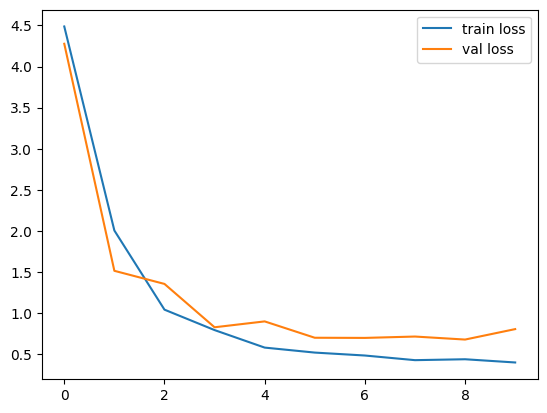

<Figure size 640x480 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

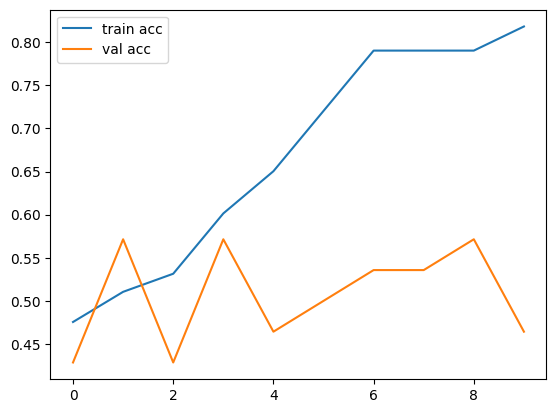

<Figure size 640x480 with 0 Axes>

In [23]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [24]:
model.evaluate(test_set)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4643 - loss: 0.8064


[0.8064354062080383, 0.4642857015132904]

In [25]:
from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

In [27]:
from tensorflow.keras.preprocessing import image

In [28]:
model = load_model("model_vgg16.h5")

In [29]:
img = "D:/Computer_Vision/B_Convolutional_NN/Bones-data/test/Spiral Fracture/247_2019_4591_Fig6_HTML_jpg.rf.1dc947109f035e160a9c7d7071e08.jpg"
     

In [30]:
img=image.load_img(img,target_size=(224,224))

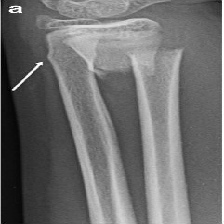

In [31]:
img

In [32]:
x=image.img_to_array(img)
x

array([[[141., 141., 141.],
        [ 17.,  17.,  17.],
        [ 22.,  22.,  22.],
        ...,
        [ 90.,  90.,  90.],
        [239., 239., 239.],
        [255., 255., 255.]],

       [[150., 150., 150.],
        [  6.,   6.,   6.],
        [ 30.,  30.,  30.],
        ...,
        [ 48.,  48.,  48.],
        [255., 255., 255.],
        [254., 254., 254.]],

       [[163., 163., 163.],
        [ 17.,  17.,  17.],
        [ 23.,  23.,  23.],
        ...,
        [ 46.,  46.,  46.],
        [247., 247., 247.],
        [251., 251., 251.]],

       ...,

       [[175., 175., 175.],
        [ 16.,  16.,  16.],
        [  9.,   9.,   9.],
        ...,
        [139., 139., 139.],
        [248., 248., 248.],
        [238., 238., 238.]],

       [[179., 179., 179.],
        [ 17.,  17.,  17.],
        [ 22.,  22.,  22.],
        ...,
        [127., 127., 127.],
        [250., 250., 250.],
        [247., 247., 247.]],

       [[165., 165., 165.],
        [ 36.,  36.,  36.],
        [ 21.,  

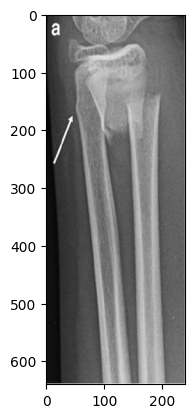

In [34]:
Z = plt.imread('D:/Computer_Vision/B_Convolutional_NN/Bones-data/test/Spiral Fracture/247_2019_4591_Fig6_HTML_jpg.rf.1dc947109f035e160a9c7d7071e08.jpg')
plt.imshow(Z)

In [35]:
x.shape

(224, 224, 3)

In [36]:
x=x/255

In [37]:
from keras.applications.vgg16 import preprocess_input
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)

In [38]:
output = model.predict(img_data)
output

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


array([[0.14497818, 0.85502183]], dtype=float32)

In [39]:
result = np.argmax(output, axis=1)
result

array([1])

In [40]:
if result[0] == 0:
    prediction = 'Oblique fracture'
    print(prediction)
else:
    prediction = 'Spiral Fracture'
    print(prediction)

Spiral Fracture
